# Data pre-processing

In [12]:
library(repr) ; options(repr.plot.width=5, repr.plot.height= 5) # Change plot sizes (in cm) - this bit of code is only relevant if you are using a juyter notebook - ignore otherwise

In [8]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [5]:
a.0<-read.csv("../Data/ThermRespData.csv", header = T)

In [2]:
str(a.0)

'data.frame':	11768 obs. of  78 variables:
 $ Input                 : Factor w/ 2 levels "Alex","Richard": 2 2 2 2 2 2 2 2 2 2 ...
 $ ID                    : int  1 1 1 1 1 2 2 2 2 2 ...
 $ OrignalTraitName      : Factor w/ 80 levels "apparent co2 assimilation rate",..: 63 63 63 63 63 63 63 63 63 63 ...
 $ OriginalTraitDef      : logi  NA NA NA NA NA NA ...
 $ StandardisedTraitName : Factor w/ 3 levels "gross photosynthesis rate",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ StandardisedTraitDef  : logi  NA NA NA NA NA NA ...
 $ OriginalTraitValue    : num  9.88 11.74 10.58 6.51 2.66 ...
 $ OriginalTraitUnit     : Factor w/ 77 levels "?","%","% of max",..: 51 51 51 51 51 51 51 51 51 51 ...
 $ OriginalErrorPos      : Factor w/ 1713 levels "-0.00493421",..: NA NA NA NA NA NA NA NA NA NA ...
 $ OriginalErrorNeg      : Factor w/ 1709 levels "-0.013043478",..: NA NA NA NA NA NA NA NA NA NA ...
 $ OriginalErrorUnit     : Factor w/ 7 levels "1 SE","1 SEM",..: NA NA NA NA NA NA NA NA NA NA ...
 $ Standardise

In [6]:
a.0<-data.frame(a.0$OrignalTraitName,a.0$OriginalTraitValue,a.0$ConTemp, a.0$ID)
colnames(a.0)=c("OTName","OTValue","ConTemp","FinalID")

In [7]:
str(a.0)

'data.frame':	11768 obs. of  4 variables:
 $ OTName : Factor w/ 80 levels "apparent co2 assimilation rate",..: 63 63 63 63 63 63 63 63 63 63 ...
 $ OTValue: num  9.88 11.74 10.58 6.51 2.66 ...
 $ ConTemp: num  20 25 30 35 40 20 25 30 35 40 ...
 $ FinalID: int  1 1 1 1 1 2 2 2 2 2 ...


In [28]:
levels(a.0$OTName)#[which(levels(a.0$OTName)=="temp")]

[1] "apparent co2 assimilation rate"                       
 [2] "apparent net photosynthesis"                          
 [3] "apparent photosynthesis"                              
 [4] "apparent photosynthetic 02 evolution"                 
 [5] "area-based light-saturated rate of net photosythesis" 
 [6] "Area-based respiration rate"                          
 [7] "cell-specific photosynthesis rate"                    
 [8] "change in o2 (photosynthesis)"                        
 [9] "change in o2 (respiration)"                           
[10] "Chl a-normalised gross photosynthesis rate"           
[11] "co2 and light saturated rates of gross photosynthesis"
[12] "co2 assimilation"                                     
[13] "co2 exchange (photosynthesis)"                        
[14] "co2 exchange (respiration)"                           
[15] "co2 production rate"                                  
[16] "co2 uptake"                                           
[17] "CO2 uptake rate"                                      
[18] "co2 uptake, photosynthesis"                           
[19] "dark capacity respiration rate"                       
[20] "dark co2 efflux"                                      
[21] "dark respiration"                                     
[22] "dark respiration rate"                                
[23] "dark respiratory CO2 release"                         
[24] "day respiration rate"                                 
[25] "gross photosynthesis"                                 
[26] "gross photosynthesis / specific growth rate"          
[27] "gross photosynthetic rate"                            
[28] "leaf respiration"                                     
[29] "light-saturated net photosynthesis"                   
[30] "log gross photosynthesis activity"                    
[31] "mass-based light-saturated rate of net photosynthesis"
[32] "Mass-based respiration rate"                          
[33] "maximum net photosynthesis"                           
[34] "maximum net photosynthesis rate"                      
[35] "maximum photosynthesis rate"                          
[36] "maximum photosynthetic capacity"                      
[37] "maximum rate of net photosynthesis"                   
[38] "net co2 assimilation"                                 
[39] "net co2 assimilation rate"                            
[40] "net CO2 assimilation rate"                            
[41] "net co2 exchange rate"                                
[42] "net CO2 fixation rate"                                
[43] "net CO2 uptake rate"                                  
[44] "net photosynthesis"                                   
[45] "net photosynthesis (Am)"                              
[46] "net photosynthesis rate"                              
[47] "net photosynthesis specific growth rate"              
[48] "net photosynthesis, co2 exchange"                     
[49] "net photosynthesis, oxygen evolved"                   
[50] "net photosynthetic rate"                              
[51] "night respiration"                                    
[52] "normalised co2 flux"                                  
[53] "o2 consumption"                                       
[54] "o2 uptake in the dark"                                
[55] "observed co2 uptake rates"                            
[56] "oxygen consumption"                                   
[57] "oxygen evolution rate"                                
[58] "oxygen evolution rate in thylakoid membranes"         
[59] "photosynthesis"                                       
[60] "photosynthesis rate"                                  
[61] "photosynthetic activity"                              
[62] "photosynthetic capacity"                              
[63] "photosynthetic co2 assimilation"                      
[64] "photosynthetic O2 evolution rate"                     
[65] "photosynthetic rate"                                  
[66] "pmax"                         

In [16]:
length(unique(a.0$FinalID))

[1] 903

In [23]:
## select records with most data
a.1<-as.data.frame(table(a.0$FinalID))
a.1<-a.1[which(a.1[,2]==max(a.1[,2])),]
a.1

[1] 528
Levels: 528

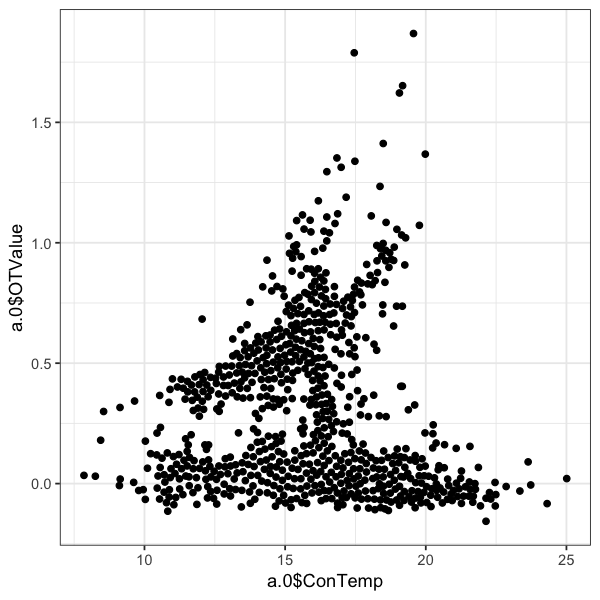

In [24]:
a.0<-a.0[which(a.0$FinalID==a.1[1,1]),]
ggplot()+theme_bw()+ylab("Original T")
geom_point(aes(y=a.0$OTValue, x=a.0$ConTemp))